In [1]:
# <span style = "font-size: 30px;"> Step 1: Import Modules

<span style = "font-size: 30px;"> Step 1: Import Modules

In [2]:
import pandas as pd
import numpy as np

<span style = "font-size: 30px;"> Step 2: Load and Explore  The data

In [3]:
train_df = pd.read_csv("train.csv")
train_df.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


**CHECKING WHETHER THERE ARE ANY NULL VALUES OR NOT**

In [5]:
train_df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

**VERIFYING WHETHER THE DATASET IS IMBALANCED OR NOT**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

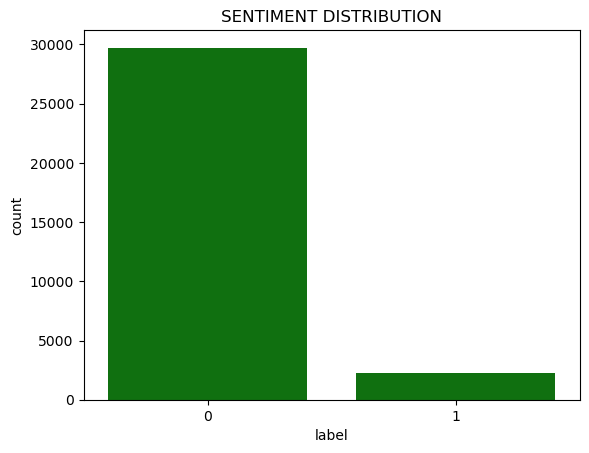

In [7]:
sns.countplot(x= 'label', data= train_df,color= 'green')
plt.title("SENTIMENT DISTRIBUTION")
plt.show()

<span style = "font-size : 30px;"> Step 3: Data Preprocessing and Cleaning

In [8]:
import re 
import nltk
from nltk.corpus import stopwords

In [9]:
nltk.download("stopwords")
stop_words= set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to C:\Users\Sanjana
[nltk_data]     Uprety\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove links
    text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

In [11]:
train_df['clean_text']= train_df['tweet'].apply (clean_text)

In [12]:
train_df.head(10)

,id,label,tweet,clean_text
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time urð ðððð ððð
4,5,0,factsguide: society now #motivation,factsguide society motivation
5,6,0,[2/2] huge fan fare and big talking before the...,22 huge fan fare big talking leave chaos pay d...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ
7,8,0,the next school year is the year for exams.ð...,next school year year examsð cant think ð scho...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land allin cavs champions cleveland cleve...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome im gr8


<span style= "font-size: 30px;"> Step 4: Convert Text Into Features/ Giving Weights

In [13]:
#convert clean_text into TF-IDF features vectors with a maximum of 8000 features

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
vectorizer= TfidfVectorizer(max_features=8000)
X= vectorizer.fit_transform(train_df['clean_text'])
y= train_df['label']

<span style = "font-size:30px;"> Step 5: Splitting The Data Into Training And Testing

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42,test_size= 0.2, stratify= y)

In [18]:
print("Shape for X_train is:",X_train.shape)
print("Shape for X_test is:",X_test.shape)
print("Shape for y_train is:",y_train.shape)
print("Shape for y_text is:",y_test.shape)

Shape for X_train is: (25569, 8000)
Shape for X_test is: (6393, 8000)
Shape for y_train is: (25569,)
Shape for y_text is: (6393,)


<span style = "font-size:30px;"> Step 6: Applying SMOTE

In [19]:
#Let's display class distribution before applying smote

In [20]:
print("Before Applying Smote:",y_train.value_counts())

Before Applying Smote: label
0    23775
1     1794
Name: count, dtype: int64


In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
from imblearn.combine import SMOTETomek
smote_tomek= SMOTETomek(random_state=42)
X_train_smote, y_train_smote= smote_tomek.fit_resample(X_train, y_train)

In [23]:
#Display Class Distribution after applying Smote

In [24]:
print(" After Applying Smote:",y_train_smote.value_counts())

 After Applying Smote: label
0    23775
1    23775
Name: count, dtype: int64


<span style = "font-size:30px;">Step 7:Model Building

**LOGISTIC REGRESSION**

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix 

In [26]:
lr= LogisticRegression()

In [27]:
lr.fit(X_train_smote, y_train_smote)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
y_pred_lr= lr.predict(X_test)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
print("Accuracy Score  For Logistic Regression :", accuracy_score(y_test, y_pred_lr))

Accuracy Score  For Logistic Regression : 0.8986391365556077


In [30]:
print(" Classification Report on Logistic Regression:\n",classification_report(y_test, y_pred_lr))

 Classification Report on Logistic Regression:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94      5945
           1       0.39      0.81      0.53       448

    accuracy                           0.90      6393
   macro avg       0.69      0.86      0.74      6393
weighted avg       0.94      0.90      0.91      6393



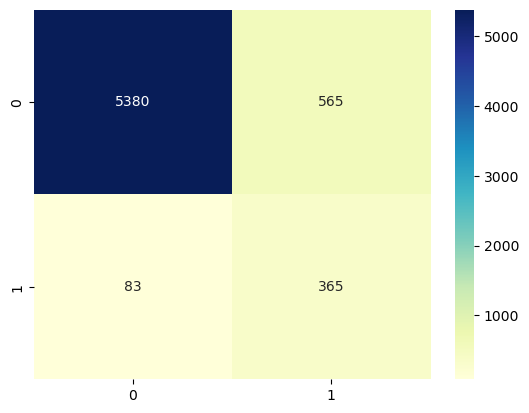

In [31]:
# plot confusion matrix as heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_lr),annot= True, cmap="YlGnBu", fmt= "d")
plt.show()

**SUPPORT VECTOR MACHINE**

In [32]:
from sklearn.svm import SVC
svm_model= SVC()

In [33]:
svm_model.fit(X_train_smote, y_train_smote)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [34]:
y_pred_svm= svm_model.predict(X_test)
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
print("Accuracy score for SVM:", accuracy_score(y_test, y_pred_svm))

Accuracy score for SVM: 0.9569842014703582


In [36]:
print(" Classification Report of SVM:\n", classification_report(y_test, y_pred_svm))

 Classification Report of SVM:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      5945
           1       0.80      0.52      0.63       448

    accuracy                           0.96      6393
   macro avg       0.88      0.75      0.80      6393
weighted avg       0.95      0.96      0.95      6393



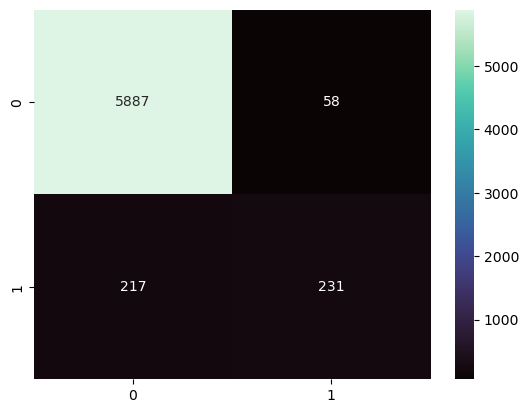

In [37]:
#plot confusion matrix as heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot= True, cmap= "mako", fmt= "d")
plt.show()

**RANDOM FOREST CLASSIFIER**

Accuracy Score for Random Forest Classifier: 0.9480681995933051
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      5945
           1       0.62      0.67      0.64       448

    accuracy                           0.95      6393
   macro avg       0.80      0.82      0.81      6393
weighted avg       0.95      0.95      0.95      6393



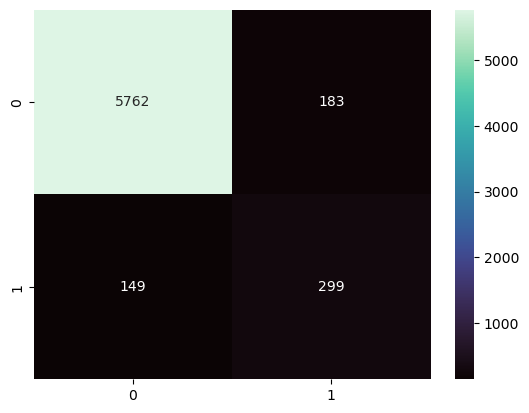

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train_smote, y_train_smote)
y_pred_rf= rf.predict(X_test)
y_pred_rf
print("Accuracy Score for Random Forest Classifier:", accuracy_score(y_test, y_pred_rf))
print("Classification report:\n", classification_report(y_test, y_pred_rf))
#plot confusion matrix as heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot= True, cmap= "mako", fmt= "d")
plt.show()

**CATBOOSTCLASSIFIER**

In [39]:
from catboost import CatBoostClassifier
cb= CatBoostClassifier(verbose=0)
cb.fit(X_train_smote, y_train_smote)

In [40]:
y_pred_cb= cb.predict(X_test)
y_pred_cb

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
print("Accuracy Score for Cat Boost Classifier is:", accuracy_score(y_test, y_pred_cb))

Accuracy Score for Cat Boost Classifier is: 0.9480681995933051


In [42]:
print("Classfication_ Report On Cat Boost:",classification_report(y_test, y_pred_cb))

Classfication_ Report On Cat Boost:               precision    recall  f1-score   support

           0       0.98      0.96      0.97      5945
           1       0.61      0.74      0.67       448

    accuracy                           0.95      6393
   macro avg       0.79      0.85      0.82      6393
weighted avg       0.95      0.95      0.95      6393



Confusion Matrix as heat map:


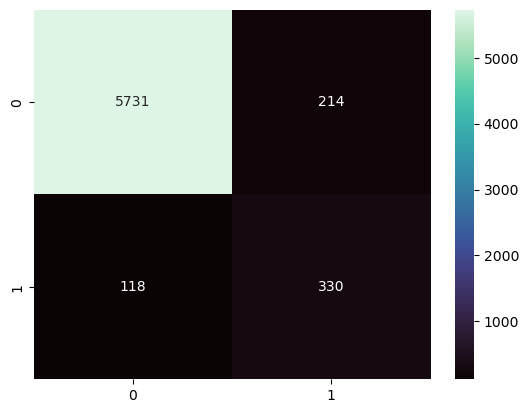

In [43]:
print("Confusion Matrix as heat map:")
sns.heatmap(confusion_matrix(y_test, y_pred_cb), annot= True, cmap= "mako", fmt= "d")
plt.show()

**NAIVE BAYES MODEL**

In [44]:
from sklearn.naive_bayes import MultinomialNB
mnb= MultinomialNB()
mnb.fit(X_train_smote, y_train_smote)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [45]:
y_pred_mnb= mnb.predict(X_test)
y_pred_mnb

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Accuracy Score of Naive Bayes Classifier: 0.9180353511653371
 Classification Report of Naive Bayes Classifier is :               precision    recall  f1-score   support

           0       0.98      0.93      0.95      5945
           1       0.45      0.80      0.58       448

    accuracy                           0.92      6393
   macro avg       0.72      0.86      0.77      6393
weighted avg       0.95      0.92      0.93      6393

Confusion Matrix as heat map


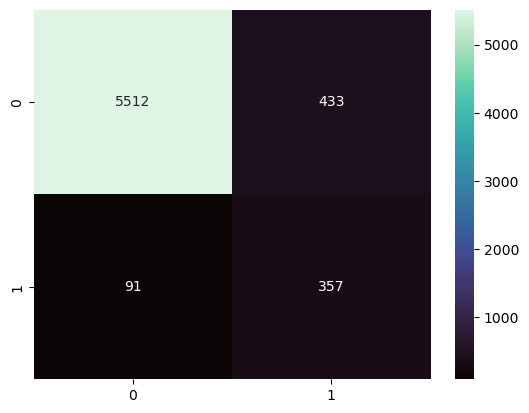

In [46]:
print("Accuracy Score of Naive Bayes Classifier:", accuracy_score(y_test, y_pred_mnb))
print(" Classification Report of Naive Bayes Classifier is :",  classification_report(y_test, y_pred_mnb))
print("Confusion Matrix as heat map")
sns.heatmap(confusion_matrix(y_test, y_pred_mnb), annot= True, cmap= "mako", fmt= "d")
plt.show()

**BAGGING CLASSIFIER**

Bagging Classifier Accuracy: 0.9369623025183795
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5945
           1       0.54      0.67      0.60       448

    accuracy                           0.94      6393
   macro avg       0.76      0.81      0.78      6393
weighted avg       0.94      0.94      0.94      6393



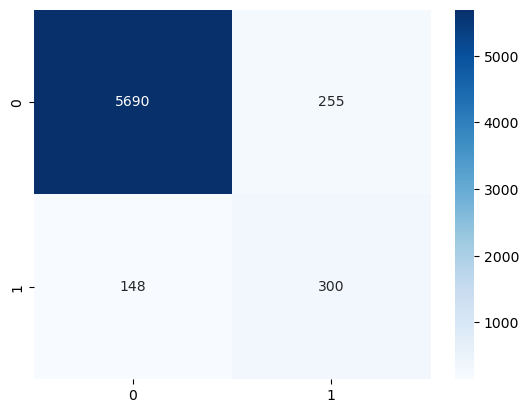

In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# Train a Bagging Classifier using Decision Trees as base estimators and evaluate its performance  
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)
bagging_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set  
y_pred_bagging = bagging_model.predict(X_test)

# Print accuracy and classification report  
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))
print(classification_report(y_test, y_pred_bagging))

# Plot confusion matrix as a heatmap  
sns.heatmap(confusion_matrix(y_test, y_pred_bagging), annot=True, fmt="d", cmap="Blues")
plt.show()

**STACKING CLASSIFIER**

In [48]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

Stacking Classifier Accuracy: 0.9547943062724855
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5945
           1       0.70      0.63      0.66       448

    accuracy                           0.95      6393
   macro avg       0.83      0.81      0.82      6393
weighted avg       0.95      0.95      0.95      6393



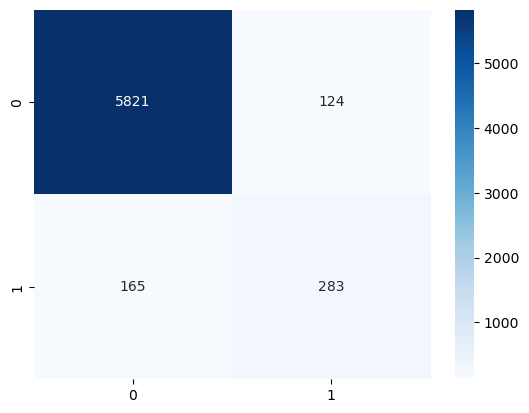

In [49]:
# Train a Stacking Classifier with Random Forest and XGBoost as base models and Logistic Regression as the final estimator  
stacking_model = StackingClassifier(
    estimators=[
        ("rf", RandomForestClassifier()), 
        ("xgb", XGBClassifier())
    ],
    final_estimator=LogisticRegression()
)

# Train the stacking model  
stacking_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set  
y_pred_stacking = stacking_model.predict(X_test)

# Print accuracy and classification report  
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))

# Plot confusion matrix as a heatmap  
sns.heatmap(confusion_matrix(y_test, y_pred_stacking), annot=True, fmt="d", cmap="Blues")
plt.show()

<span style="font-size: 30px;">STEP 7:COMPARISON BETWEEN ALL THE TRAINED MODELS

In [50]:
#store model name and corresponding accuracy score for all the models
models= ['Logistic Regression', 'SVM','Random Forest Classifier',' Cat Boost Classifier','Naive Bayes Model',' Bagging Classifier','Stacking Classifier' ]

In [51]:
y_preds=[y_pred_lr, y_pred_svm,y_pred_rf,y_pred_cb,y_pred_mnb, y_pred_mnb, y_pred_bagging, y_pred_stacking]
for i in range(len(models)):
    print(f"---{models[i]}---")
    accuracy= accuracy_score(y_test, y_preds[i])
    print(f"Accuracy:{accuracy}")
    print("classification report:")
    print(classification_report(y_test, y_preds[i]))
    print("confusion matrix:")
    print(confusion_matrix(y_test, y_preds[i]))
    print("\n")

---Logistic Regression---
Accuracy:0.8986391365556077
classification report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      5945
           1       0.39      0.81      0.53       448

    accuracy                           0.90      6393
   macro avg       0.69      0.86      0.74      6393
weighted avg       0.94      0.90      0.91      6393

confusion matrix:
[[5380  565]
 [  83  365]]


---SVM---
Accuracy:0.9569842014703582
classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5945
           1       0.80      0.52      0.63       448

    accuracy                           0.96      6393
   macro avg       0.88      0.75      0.80      6393
weighted avg       0.95      0.96      0.95      6393

confusion matrix:
[[5887   58]
 [ 217  231]]


---Random Forest Classifier---
Accuracy:0.9480681995933051
classification report:
              precision    recal

In [52]:
accuracies = []
precisions = []
recalls = []
f1_scores = []
conf_matrices = []

for i in range(len(models)):
    print(f"--- {models[i]} ---")

    acc = accuracy_score(y_test, y_preds[i])
    report = classification_report(y_test, y_preds[i], output_dict=True)
    cm = confusion_matrix(y_test, y_preds[i])

    accuracies.append(acc)
    precisions.append(report['weighted avg']['precision'])
    recalls.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])
    conf_matrices.append(cm)

    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_preds[i]))
    print("Confusion Matrix:")
    print(cm)
    print("\n")


--- Logistic Regression ---
Accuracy: 0.8986
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      5945
           1       0.39      0.81      0.53       448

    accuracy                           0.90      6393
   macro avg       0.69      0.86      0.74      6393
weighted avg       0.94      0.90      0.91      6393

Confusion Matrix:
[[5380  565]
 [  83  365]]


--- SVM ---
Accuracy: 0.9570
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5945
           1       0.80      0.52      0.63       448

    accuracy                           0.96      6393
   macro avg       0.88      0.75      0.80      6393
weighted avg       0.95      0.96      0.95      6393

Confusion Matrix:
[[5887   58]
 [ 217  231]]


--- Random Forest Classifier ---
Accuracy: 0.9481
Classification Report:
              precision    recall  f1-score   support

    

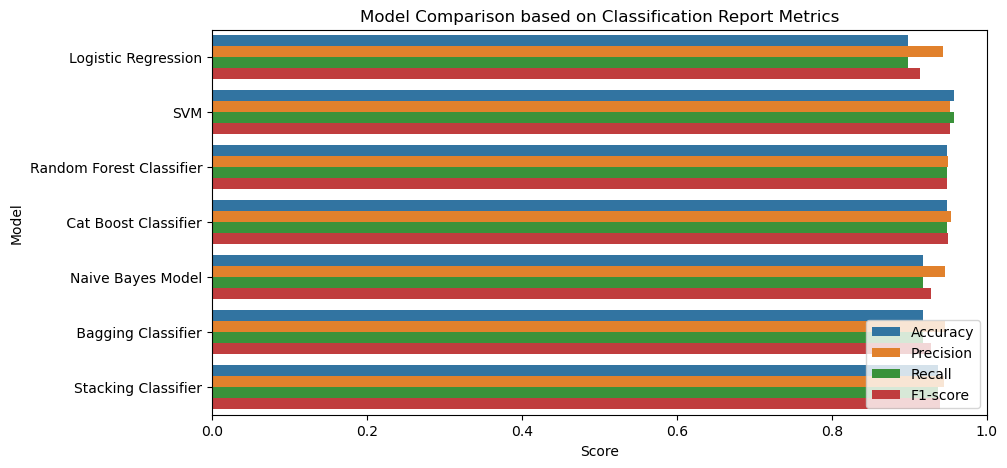

In [53]:
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-score': f1_scores
})

metrics_df = metrics_df.melt(
    id_vars='Model',
    var_name='Metric',
    value_name='Score'
)

plt.figure(figsize=(10, 5))
sns.barplot(data=metrics_df, y='Model', x='Score', hue='Metric')
plt.xlabel("Score")
plt.title("Model Comparison based on Classification Report Metrics")
plt.xlim(0, 1)
plt.legend(loc='lower right')
plt.show()


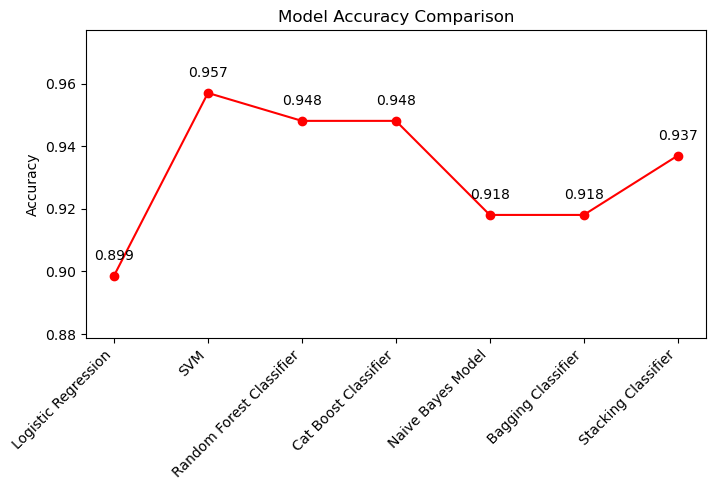

In [54]:
plt.figure(figsize=(8, 4))
plt.plot(models, accuracies, marker='o', linestyle='-', color='r')
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45, ha='right')

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.3f}", ha='center')

plt.ylim(min(accuracies) - 0.02, max(accuracies) + 0.02)  # Adjust y-axis range
plt.show()

In [55]:
import pandas as pd

metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-score': f1_scores
})

metrics_df


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.898639,0.943298,0.898639,0.914225
1,SVM,0.956984,0.952877,0.956984,0.952628
2,Random Forest Classifier,0.948068,0.949953,0.948068,0.948943
3,Cat Boost Classifier,0.948068,0.953672,0.948068,0.950370
4,Naive Bayes Model,0.918035,0.946488,0.918035,0.928143
5,Bagging Classifier,0.918035,0.946488,0.918035,0.928143
6,Stacking Classifier,0.936962,0.944228,0.936962,0.940039


In [56]:
rank_df = metrics_df.copy()

for metric in ['Accuracy', 'Precision', 'Recall', 'F1-score']:
    rank_df[f'{metric}_Rank'] = rank_df[metric].rank(ascending=False)

rank_df['Average_Rank'] = rank_df[
    ['Accuracy_Rank', 'Precision_Rank', 'Recall_Rank', 'F1-score_Rank']
].mean(axis=1)

rank_df.sort_values(by='Average_Rank')


,Model,Accuracy,Precision,Recall,F1-score,Accuracy_Rank,Precision_Rank,Recall_Rank,F1-score_Rank,Average_Rank
1,SVM,0.956984,0.952877,0.956984,0.952628,1.0,2.0,1.0,1.0,1.25
3,Cat Boost Classifier,0.948068,0.953672,0.948068,0.950370,2.5,1.0,2.5,2.0,2.00
2,Random Forest Classifier,0.948068,0.949953,0.948068,0.948943,2.5,3.0,2.5,3.0,2.75
6,Stacking Classifier,0.936962,0.944228,0.936962,0.940039,4.0,6.0,4.0,4.0,4.50
4,Naive Bayes Model,0.918035,0.946488,0.918035,0.928143,5.5,4.5,5.5,5.5,5.25
5,Bagging Classifier,0.918035,0.946488,0.918035,0.928143,5.5,4.5,5.5,5.5,5.25
0,Logistic Regression,0.898639,0.943298,0.898639,0.914225,7.0,7.0,7.0,7.0,7.00


<span style= " font-size:30px;"> Step 8: Let's try our model - Best One- SVM

In [75]:
# Sample text to predict
test_text = "fuck you,kill you"

# Preprocess the text
cleaned_text = clean_text(test_text)  

# Convert text into feature vector using the same vectorizer
z = vectorizer.transform([cleaned_text])  

# Predict using the trained stacking model
y_pred_svm = svm_model.predict(z)

print("Prediction:", y_pred_svm)

Prediction: [1]


<span style= "font-size:30px"> Step 9: Let's save the train model and Td-Idf 

In [67]:
import joblib

In [70]:
#save the trained svm model and the vectorizer
joblib.dump(svm_model, "svm_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']